# House Price Analysis

## Table of Contents


* [Import Libraries](#import)
* [Data Cleaning](#cleaning)
    - [Train](#train)
    - [Test](#test)
* [Feature Engineering](#feature)
* [Analysis](#analysis)
    - [Visualizations](#visual)
    - [Models](#models)
        - [Random Forest](#random)
        - [Gradient](#gradient)
        - [Logistic](#logistic)
        - [Decision Tree](#decision)
    - [Final Accuracies](#final)
* [Submisson](#submission)  

<a id = 'import'></a>
# Import

In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor


labelencoder = LabelEncoder()
%matplotlib inline

from sklearn.datasets import load_boston
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [186]:
def dummyEncode(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
            print(df[feature])
        except:
            print('Error encoding '+feature)
    return df

In [187]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [188]:
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<a id = 'cleaning'></a>
# Data Cleaning

<a id = "train"></a>
## Train Data

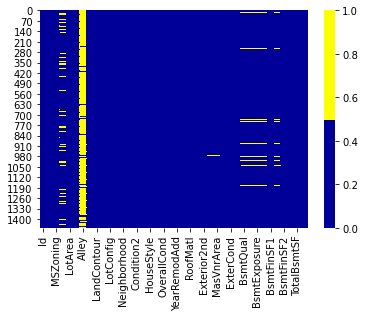

In [189]:
cols = train_data.columns[:40] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train_data[cols].isnull(), cmap=sns.color_palette(colours))

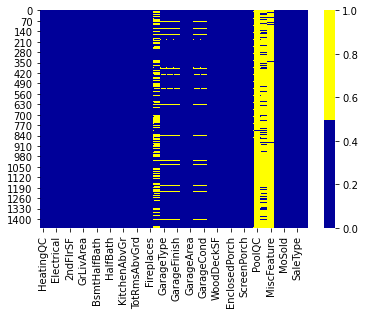

In [190]:
cols = train_data.columns[40:80] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train_data[cols].isnull(), cmap=sns.color_palette(colours))

In [191]:
data = [train_data['Id'],train_data['SalePrice'], train_data['LotArea'], train_data['LotFrontage'],train_data['SaleType'],train_data['Condition2']]
headers = ["Id","SalePrice","LotArea","LotFrontage","SaleType","Condition"]
train = pd.concat(data, axis=1, keys=headers)
train.head()

,Id,SalePrice,LotArea,LotFrontage,SaleType,Condition
0,1,208500,8450,65.0,WD,Norm
1,2,181500,9600,80.0,WD,Norm
2,3,223500,11250,68.0,WD,Norm
3,4,140000,9550,60.0,WD,Norm
4,5,250000,14260,84.0,WD,Norm


In [192]:
train = dummyEncode(train)
train.head()

0       8
1       8
2       8
3       8
4       8
       ..
1455    8
1456    8
1457    8
1458    8
1459    8
Name: SaleType, Length: 1460, dtype: int64
0       2
1       2
2       2
3       2
4       2
       ..
1455    2
1456    2
1457    2
1458    2
1459    2
Name: Condition, Length: 1460, dtype: int64


,Id,SalePrice,LotArea,LotFrontage,SaleType,Condition
0,1,208500,8450,65.0,8,2
1,2,181500,9600,80.0,8,2
2,3,223500,11250,68.0,8,2
3,4,140000,9550,60.0,8,2
4,5,250000,14260,84.0,8,2


<a id = "test"></a>
## Test Data

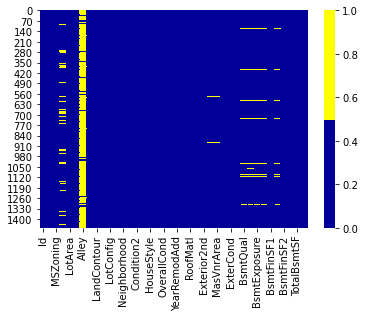

In [193]:
cols = test_data.columns[0:40] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(test_data[cols].isnull(), cmap=sns.color_palette(colours))

In [194]:
data = [train_data['Id'],test_data['LotArea'], test_data['LotFrontage'],test_data['SaleType'],test_data['Condition2']]
headers = ["Id","LotArea","LotFrontage","SaleType","Condition"]
test = pd.concat(data, axis=1, keys=headers)
test.head()

,Id,LotArea,LotFrontage,SaleType,Condition
0,1,11622.0,80.0,WD,Norm
1,2,14267.0,81.0,WD,Norm
2,3,13830.0,74.0,WD,Norm
3,4,9978.0,78.0,WD,Norm
4,5,5005.0,43.0,WD,Norm


In [195]:
test = dummyEncode(train)
test.head()

#Sale Type
    #0 COD
    #1
    #2
    #3
    #4
    #5
    #6 New
    #7 
    #8 WD
#Condition
    #0 Artery
    #1
    #2 Norm
    #3
    #4
    #5
    #6
    #7 RRNn 

,Id,SalePrice,LotArea,LotFrontage,SaleType,Condition
0,1,208500,8450,65.0,8,2
1,2,181500,9600,80.0,8,2
2,3,223500,11250,68.0,8,2
3,4,140000,9550,60.0,8,2
4,5,250000,14260,84.0,8,2


<a id = 'feature'></a>
# Feature Engineering

In [196]:
med_train = train['LotFrontage'].median()
print(med_train)
train['LotFrontage'] = train['LotFrontage'].fillna(med_train)

train['PrecFrontage'] = train['LotFrontage']/train['LotArea'] * 100

med_test = test['LotFrontage'].median()
print(med_test)
test['LotFrontage'] = test['LotFrontage'].fillna(med_test)

test['PrecFrontage'] = test['LotFrontage'] / test['LotArea'] * 100

train.head()

69.0
69.0


,Id,SalePrice,LotArea,LotFrontage,SaleType,Condition,PrecFrontage
0,1,208500,8450,65.0,8,2,0.769231
1,2,181500,9600,80.0,8,2,0.833333
2,3,223500,11250,68.0,8,2,0.604444
3,4,140000,9550,60.0,8,2,0.628272
4,5,250000,14260,84.0,8,2,0.589060


<a id = "analysis"></a>
# Analysis

<a id = "visual"></a>
## Visualizations

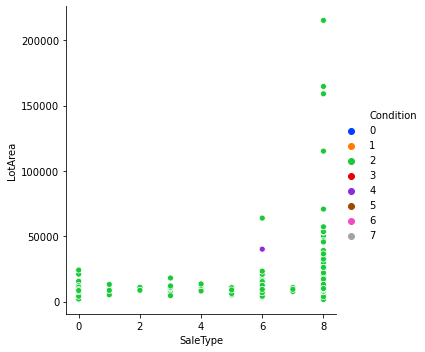

In [197]:
palette = sns.color_palette("bright", 8)
sns.relplot(x="SaleType", y="LotArea", hue="Condition", data=train, legend = 'full', palette=palette)



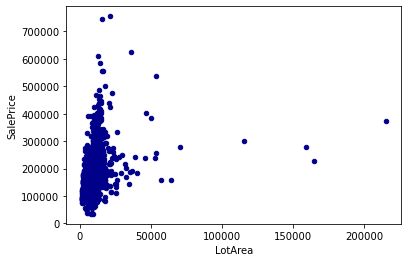

In [198]:
ax1 = train.plot.scatter(x='LotArea',
                      y='SalePrice',
                      c='DarkBlue')

<a id = "model"></a>
## Model

In [199]:
dataset = pd.get_dummies(train, columns = ["LotArea", "SalePrice"])

#train_final = dataset[:len(train_data)]
#test_final = dataset[len(test_data):]

y=train['SalePrice']
X=train.drop('SalePrice', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 473, random_state = 2)
print(X_train,X_val, y_train, y_val)

        Id  LotArea  LotFrontage  SaleType  Condition  PrecFrontage
1181  1182     5587         64.0         6          2      1.145516
1173  1174    18030        138.0         8          2      0.765391
1270  1271    23595         69.0         8          2      0.292435
549    550     9375         75.0         8          2      0.800000
457    458    53227         69.0         8          2      0.129633
...    ...      ...          ...       ...        ...           ...
466    467    10628         85.0         8          2      0.799774
299    300    14000         80.0         8          2      0.571429
493    494     7931         70.0         8          2      0.882613
527    528    14948         67.0         6          2      0.448220
1192  1193     9600         60.0         8          2      0.625000

[987 rows x 6 columns]         Id  LotArea  LotFrontage  SaleType  Condition  PrecFrontage
503    504    15602        100.0         8          2      0.640943
101    102     9206     

<a id = "forest"></a>
### Random Forest

In [200]:
model_1 = RandomForestClassifier(n_estimators=100)
model_1.fit(X_train, y_train)

predict1 = model_1.predict(X_val)
acuracy1 = accuracy_score(predict1, y_val)
print('Accuracy: ', acuracy1)

Accuracy:  0.012684989429175475


<a id = "gradient"></a>
### Gradient Regression

In [201]:
#model_2 = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.05)
#model_2.fit(X_train, y_train)

#predict2 = model_2.predict(X_val)
#acuracy2 = accuracy_score(predict2, y_val)
#print('Accuracy: ', acuracy2)

<a id = "logistic"></a>
### Logistic Regression

In [202]:
model_3 = LogisticRegression(random_state=0)
model_3.fit(X_train, y_train)

predict3 = model_3.predict(X_val)
acuracy3 = accuracy_score(predict3, y_val)
print('Accuracy: ', acuracy3)

Accuracy:  0.008456659619450317


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<a id = "decision"></a>
### Decision Tree

In [203]:
model_4 =  DecisionTreeClassifier()
model_4.fit(X_train, y_train)

predict4 = model_4.predict(X_val)
acuracy4 = accuracy_score(predict4, y_val)
print('Accuracy: ', acuracy4)

Accuracy:  0.008456659619450317


<a id = "final"></a>
# Final Accuracies

In [204]:
df = pd.DataFrame({'Random Forest': acuracy1, 'Logistic': acuracy3, ' Decision Tree': acuracy4} , index=[0])
df.rename(index={0:'Accuracy'}, inplace=True)
df

NameError: name 'acuracy2' is not defined

<a id = "submit"></a>
# Submission

In [ ]:
y_train = train['SalePrice']
X_train = train_data[['Id','LotArea', 'PrecFrontage']]

X_test = test_data[['Id','LotArea', 'PrecFrontage']]
selected_columns = X_train[['Id','LotArea', 'PrecFrontage']]
df1 = selected_columns.copy()

y_train = y_train.reindex(X_test.index)
X_train = X_train.reindex(X_test.index)
df1 = X_test.reindex(X_test.index)

In [ ]:
final_model = RandomForestClassifier(n_estimators=100)
final_model.fit(df1, y_train)

final_predictions = final_model.predict(test)
output = pd.DataFrame({'PassengerId': test.Id, 'Survived': final_predictions})
final_accuracy = accuracy_score(final_predictions, y_train)
print('Accuracy: ', final_accuracy)

output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
output.head()